<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [251]:
data = pd.read_csv('asset_price_data.csv')

In [253]:
#Copy the dataframe into a new dataframe
df = data.copy()
df.shape

(783, 6)

In [255]:
df.dtypes

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Asset1,770.0,248.980188,6.845006,229.701200,246.868050,250.685350,253.379275,259.110
Asset2,770.0,76.112381,13.642823,48.516000,64.786250,72.003000,88.973000,104.663
Asset3,770.0,31.473296,3.304415,22.895066,29.281948,30.651198,33.757265,39.115
Asset4,734.0,327.356880,13.487611,272.790000,318.765000,326.665000,340.155000,345.710
Asset5,763.0,54.123198,8.185047,37.340000,49.120000,52.720000,59.500000,71.050


In [259]:
df.isna().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

### Performing the filling of Asset Values of missing dates with the previous days data

In [262]:
# Convert the date column to DateTime format
df['date'] = pd.to_datetime(df['date'])

# Generate a date range series
start_date = df['date'].min()
end_date = df['date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
date_df = pd.DataFrame(date_range, columns=['date'])

In [264]:
df = pd.merge(date_df,df,on='date', how='left')
df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-05,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1090,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
1091,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
1092,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
1093,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [266]:
# Fill missing values in the original data frame with the previous available value
df = df.ffill()
df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-05,230.4026,56.129,26.147133,301.77,51.38
4,2019-01-06,230.4026,56.129,26.147133,301.77,51.38
...,...,...,...,...,...,...
1090,2021-12-27,249.9207,103.956,38.820000,342.40,70.11
1091,2021-12-28,249.9368,104.526,39.115000,342.40,70.03
1092,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
1093,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


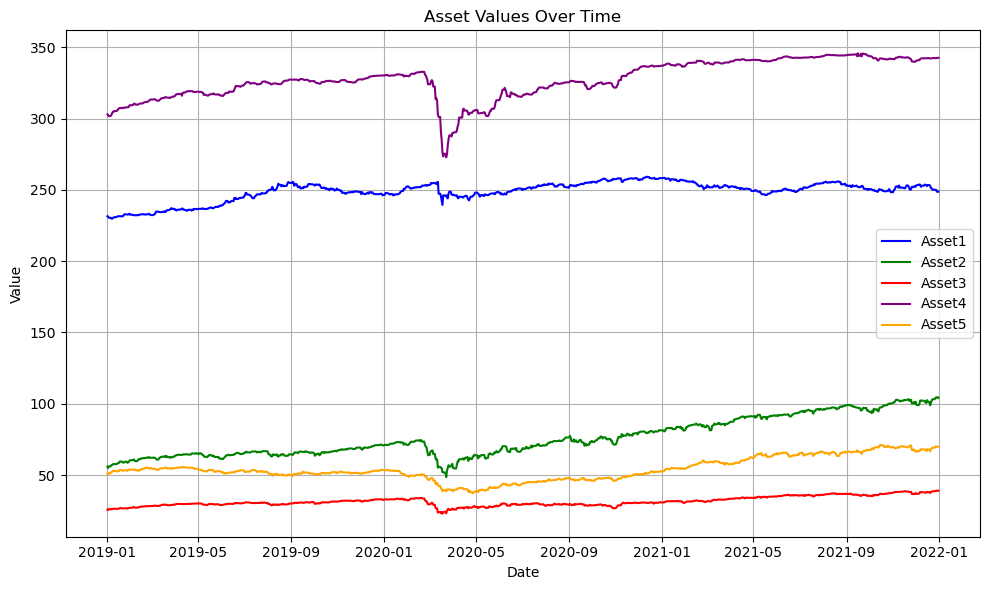

In [268]:
# Plot each asset
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Asset1'], label='Asset1', color='blue')
plt.plot(df['date'], df['Asset2'], label='Asset2', color='green')
plt.plot(df['date'], df['Asset3'], label='Asset3', color='red')
plt.plot(df['date'], df['Asset4'], label='Asset4', color='purple')
plt.plot(df['date'], df['Asset5'], label='Asset5', color='orange')

# Add labels and legend
plt.title('Asset Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Asset Performance:

- Asset4 (purple) has the highest overall value and steady growth, with a noticeable dip around early 2020 but recovery afterward.
- Asset1 (blue) is the second-highest performer, showing stability over time with minor fluctuations.
- Asset2 (green) exhibits consistent growth, starting at a lower value but steadily increasing throughout the period.
- Asset3 (red) and Asset5 (orange) have the lowest values but maintain relatively stable trajectories with minor dips in early 2020.

Impact of Early 2020 (Possible Pandemic Effect):

All assets experienced a noticeable dip in early 2020, suggesting a potential market-wide event affecting asset values.

Asset4 and Asset2 were most impacted but showed strong recovery trends shortly after.
Volatility:

Asset4 appears to have the most significant swings, indicating higher volatility.

Assets3 and Asset5 have the least variation, suggesting lower risk but also lower growth potential.
Growth Patterns:

Asset2 has the most consistent upward trend, potentially indicating strong and reliable growth.

Asset4, despite its fluctuations, demonstrates significant growth potential with the highest value over time.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [272]:
# Calculate daily percentage returns for each asset
for asset in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    df[f'{asset}_returns'] = df[asset].pct_change()
    
# Print the daily percentage returns
daily_returns = df[['date', 'Asset1_returns', 'Asset2_returns', 'Asset3_returns', 'Asset4_returns', 'Asset5_returns']]
daily_returns

,date,Asset1_returns,Asset2_returns,Asset3_returns,Asset4_returns,Asset5_returns
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,2019-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
4,2019-01-06,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
1090,2021-12-27,-0.000913,0.007384,0.005439,0.000000,0.013443
1091,2021-12-28,0.000064,0.005483,0.007599,0.000000,-0.001141
1092,2021-12-29,-0.004862,-0.001588,-0.006647,0.000175,-0.003142
1093,2021-12-30,-0.000696,0.002903,0.003346,0.000263,0.001432


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

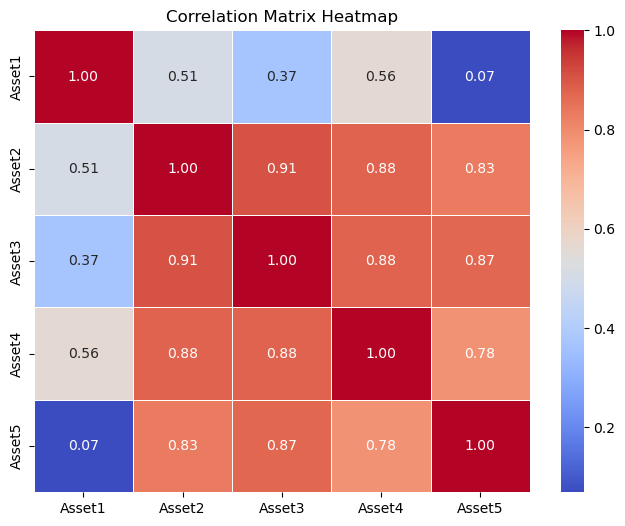

In [275]:
correlation_matrix = df[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

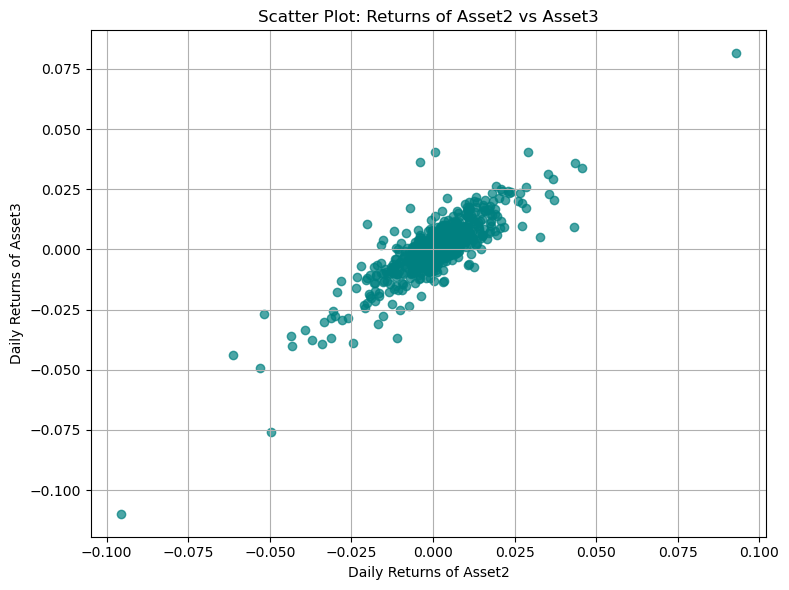

In [278]:
# Scatter plot between Asset2 and Asset3
plt.figure(figsize=(8, 6))
plt.scatter(df['Asset2_returns'], df['Asset3_returns'], color='teal', alpha=0.7)
plt.title('Scatter Plot: Returns of Asset2 vs Asset3')
plt.xlabel('Daily Returns of Asset2')
plt.ylabel('Daily Returns of Asset3')
plt.grid(True)
plt.tight_layout()
plt.show()

## Highly Correlated Assets:

Asset2 and Asset3 have the highest correlation (0.91), indicating they move together closely and might be influenced by similar factors.
Asset2 also has strong correlations with Asset4 (0.88) and Asset5 (0.83).
Asset3 is strongly correlated with both Asset4 (0.88) and Asset5 (0.87).

## Low Correlation:

Asset1 and Asset5 have the lowest correlation (0.07), suggesting their values are almost independent of each other.
Asset1 also has weak correlations with Asset3 (0.37) and Asset2 (0.51).
Asset4 as a Central Player:

Asset4 shows moderately high correlations with Asset2 (0.88), Asset3 (0.88), and Asset5 (0.78), suggesting it shares trends with these assets but retains some independence.
Diversification Potential:

Asset1, with its weak correlations to most other assets, provides the best diversification opportunities in a portfolio.

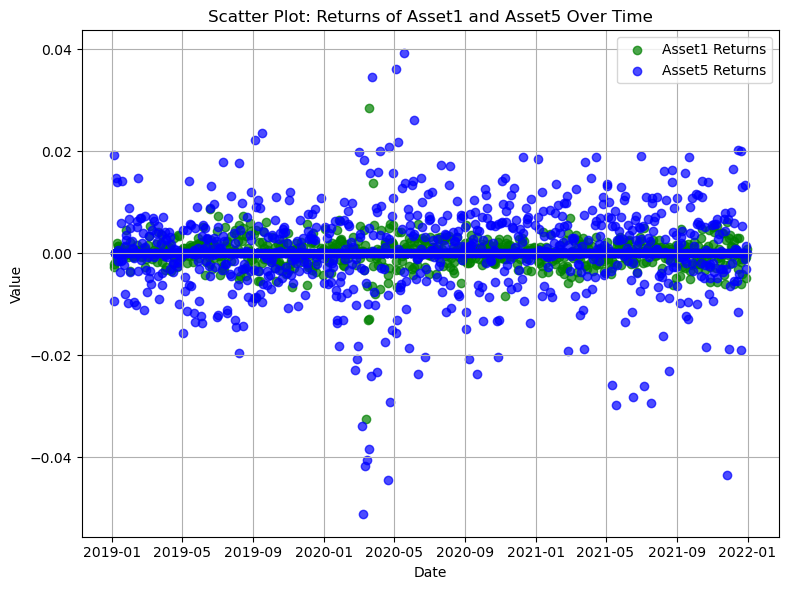

In [280]:
# Scatter plot between Asset2 and Asset3 with Date
plt.figure(figsize=(8, 6))
plt.scatter(df['date'], df['Asset1_returns'], color='green', alpha=0.7, label='Asset1 Returns')
plt.scatter(df['date'], df['Asset5_returns'], color='blue', alpha=0.7, label='Asset5 Returns')
plt.title('Scatter Plot: Returns of Asset1 and Asset5 Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- The scatter plot displays the daily returns of Asset1 (green) and Asset5 (blue) over time, with most data points clustered around a value of 0, indicating small daily return fluctuations.
- Asset5 exhibits greater variability with more extreme positive and negative returns compared to Asset1, which has a narrower dispersion.
- The returns of both assets show no clear trend over time, suggesting minimal long-term directional bias in their daily performance.

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [284]:
pf_wgts_df = pd.read_csv('portfolio_weights.csv')
pf_wgts_df['date'] = pd.to_datetime(pf_wgts_df['date'])
pf_wgts_df = pd.merge(date_df,pf_wgts_df,on='date',how='left')
pf_wgts_df = pf_wgts_df.ffill()
pf_wgts_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-05,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-06,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
1090,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
1091,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
1092,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
1093,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


<Figure size 1000x600 with 0 Axes>

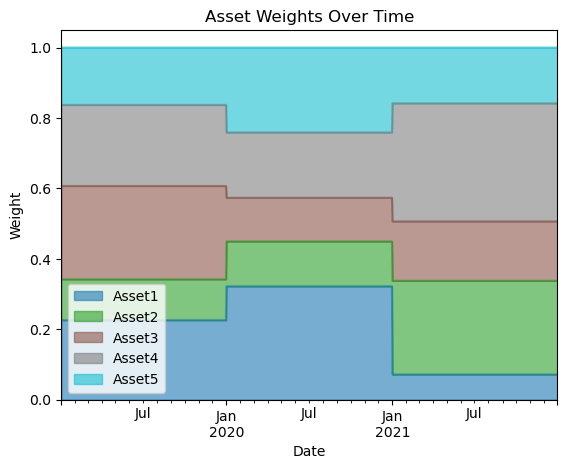

In [286]:
# Set the 'date' column as the index
pf_wgts_df.set_index('date', inplace=True)

# Plot the area chart
plt.figure(figsize=(10,6))
pf_wgts_df.plot(kind='area', stacked=True, alpha=0.6, colormap='tab10')

# Add titles and labels
plt.title('Asset Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')

# Display the chart
plt.show()

The graph depicts the allocation of asset weights over time as a stacked area chart, with each segment representing a specific asset's contribution to the total weight (which sums to 1.0 at all times). Here's a summary:

Assets Represented: There are five assets (Asset1 to Asset5), distinguished by color in the legend.

Weight Dynamics:

- Asset1 (blue): Maintains a stable weight contribution through most of the timeline, with slight reductions or increments at specific intervals.
- Asset2 (green): Shows a gradual increase in weight over time, becoming more prominent in the later periods.
- Asset3 (brown): Exhibits some variability, decreasing and increasing weight at different intervals.
- Asset4 (gray): Has a relatively stable weight across the timeline but shifts slightly around key points.
- Asset5 (light blue): Demonstrates significant adjustments in its weight allocation, with periods of high dominance and rapid decreases.
Timeline:

From mid-2019 through late 2021, the weights of assets dynamically shift, suggesting rebalancing or strategic adjustments in allocation at specific dates (e.g., January 2020, July 2020, January 2021).
Total Weight Constraint: The stacked area chart ensures that all assets combined always sum to 1.0, reflecting proportional adjustments among the assets.



<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [289]:
#Set the daily returns date
daily_returns.set_index('date', inplace=True)

In [307]:
portfolio_returns = pd.DataFrame({'Asset1': pf_wgts_df['Asset1'] * daily_returns['Asset1_returns'],
                                  'Asset2': pf_wgts_df['Asset2'] * daily_returns['Asset2_returns'],
                                  'Asset3': pf_wgts_df['Asset3'] * daily_returns['Asset3_returns'],
                                  'Asset4': pf_wgts_df['Asset4'] * daily_returns['Asset4_returns'],
                                  'Asset5': pf_wgts_df['Asset5'] * daily_returns['Asset5_returns']}).sum(axis=1)

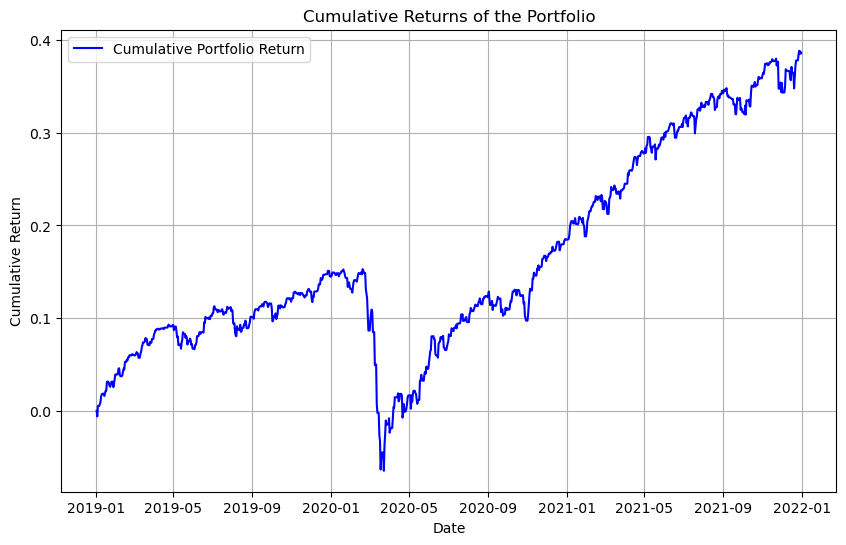

In [309]:
# Calculate cumulative returns by compounding the daily returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Portfolio Return', color='b')
plt.title('Cumulative Returns of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()

### Key Features of the Graph:
- Y-Axis (Cumulative Return): Represents the cumulative returns of the portfolio as a percentage. It starts at 0 (initial investment) and grows as the portfolio gains value over time.
- X-Axis (Date): Represents the timeline from January 2019 to January 2022.
- Line Plot: Tracks the cumulative portfolio return over time, highlighting periods of growth and decline.

### Insights:

### General Growth:

The portfolio shows an overall upward trend, with cumulative returns reaching approximately 40% by early 2022. This indicates positive long-term growth.

### Market Volatility:

- Significant Drop in Early 2020: A sharp decline is visible around February-March 2020, likely caused by the market reaction to the COVID-19 pandemic. This reflects a major drawdown in the portfolio value.
  
- Recovery After March 2020: The portfolio exhibits a strong recovery following the initial pandemic-induced dip, indicating robust performance during the market rebound.

- Steady Growth in 2021: From late 2020 to the end of 2021, the portfolio shows steady growth with fewer significant dips. This period likely reflects stable market conditions and effective portfolio management.


### Periodic Fluctuations:

While the portfolio trends upward, there are smaller fluctuations throughout the timeline, suggesting sensitivity to market conditions or adjustments in asset allocation.

## Conclusion:

The portfolio has delivered consistent long-term returns despite short-term volatility, particularly during early 2020. This performance may indicate an effective investment strategy, resilience during market downturns, and the ability to capitalize on recoveries. However, the sharp drawdown highlights the importance of risk management in volatile markets.

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [319]:
# Calculate the number of years (assuming 261 trading days per year as given)
years = len(daily_returns) / 261

# Calculate the annualized return
annualized_return = (1 + cumulative_returns.iloc[-1])**(1/years) - 1

annualized_return

0.0808584249303792

### The annualized return of 0.08086 (or ~8.1%) represents the average yearly return the portfolio has generated over the analyzed time period.

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [323]:
# Calculate the daily standard deviation (volatility) of the portfolio returns
daily_volatility = portfolio_returns.std()

# Annualize the volatility (using 261 trading days per year)
annualized_volatility = daily_volatility * np.sqrt(261)

annualized_volatility

0.07199414898536845

### The annualized volatility of 0.07199 (or ~7.2%) represents the portfolio's level of risk or fluctuation in returns over a year.

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [327]:
asset_info = pd.read_csv('asset_information_data.csv')
asset_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


<Figure size 1000x600 with 0 Axes>

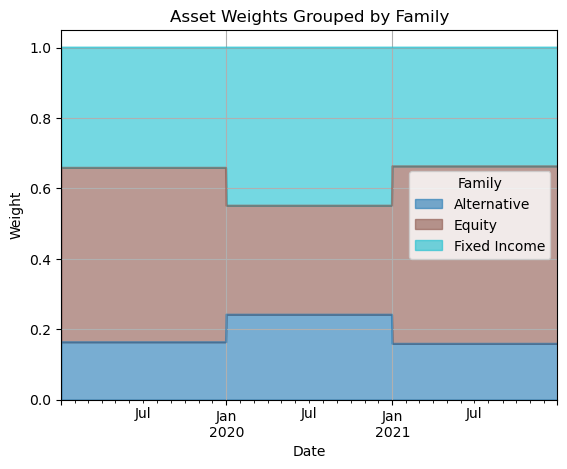

In [423]:
df_melted = pf_wgts_df.reset_index().melt(id_vars='date', value_vars=pf_wgts_df.columns)
df_melted = df_melted.rename(columns={'variable': 'asset', 'value': 'weight'})

# Merge with asset family data to get family information
df_melted = df_melted.merge(asset_info, how='left', left_on='asset', right_on='Name')

# Group by date and family, summing the weights for each group
df_grouped = df_melted.groupby(['date', 'Family'])['weight'].sum().unstack(fill_value=0)

# Plot the area chart for grouped categories
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='area', stacked=True, alpha=0.6, colormap='tab10')

# Add titles and labels
plt.title('Asset Weights Grouped by Family')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.grid(True)
plt.legend(title='Family')

# Display the chart
plt.show()

## Observations:

### Fixed Income Dominance:

- Fixed Income (light blue) starts with a very high allocation (~70%) and remains the dominant asset class throughout most of the timeline.
Its weight decreases slightly around January 2021, indicating a potential shift toward other asset families.

### Equity Allocation:

- Equity (brown) shows a steady allocation of ~30% for most of the timeline. It increases slightly after January 2021, likely due to a reallocation from Fixed Income to capture potential equity market opportunities.

### Alternative Allocation:

- Alternative investments (blue) have the smallest allocation initially (~0-10%). Around January 2020, there is a small increase in its allocation, reflecting an effort to diversify the portfolio.

### Portfolio Rebalancing:

- Around January 2021, a notable adjustment occurs: Fixed Income decreases in favor of Equity. Alternatives see a slight increase, suggesting a diversification strategy or response to market conditions.